In [11]:
pip install nltools

  Using cached nltools-0.4.7-py2.py3-none-any.whl (3.3 MB)
  Using cached nilearn-0.9.2-py3-none-any.whl (9.6 MB)
  Using cached deepdish-0.3.7-py2.py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 939.8 kB/s eta 0:00:0000:0100:01
  Using cached pynv-0.2-py3-none-any.whl (3.6 kB)
  Using cached nibabel-4.0.2-py3-none-any.whl (3.3 MB)
  Using cached scipy-1.7.3-cp37-cp37m-macosx_10_9_x86_64.whl (33.0 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pynndescent 0.5.2 requires numba>=0.51.2, but you have numba 0.48.0 which is incom

In [12]:
pip install bids

  Using cached bids-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached pybids-0.15.5-py3-none-any.whl (14.9 MB)
  Using cached bids_validator-1.9.9-py2.py3-none-any.whl (21 kB)
  Using cached formulaic-0.3.4-py3-none-any.whl (68 kB)
  Using cached num2words-0.5.12-py3-none-any.whl (125 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)
  Using cached pandas-1.3.5-cp37-cp37m-macosx_10_9_x86_64.whl (11.0 MB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0
You should consider upgrading via the '/Users/jihyeonje/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.data import Brain_Data, Design_Matrix, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import zscore, fdr, one_sample_permutation
from nltools.file_reader import onsets_to_dm
from nltools.plotting import component_viewer
from scipy.stats import binom, ttest_1samp
from sklearn.metrics import pairwise_distances
from copy import deepcopy
import networkx as nx
from nilearn.plotting import plot_stat_map, view_img_on_surf
from bids import BIDSLayout, BIDSValidator


In [2]:
sub = 'S01'
fwhm=6
layout = BIDSLayout(data_dir, derivatives=True)

data = Brain_Data(layout.get(subject=sub, task='localizer', scope='derivatives', suffix='bold', extension='nii.gz', return_type='file')[0])
smoothed = data.smooth(fwhm=fwhm)

NameError: name 'data_dir' is not defined

In [4]:
import pandas as pd
data=pd.read_csv('/Users/jihyeonje/Desktop/connectivity_matrix',sep='\t',index_col=0)


In [5]:
data

,106,107,108,109,112,113,114,115,124,125,...,699,710,720,721,740,760,780,800,850,900
0,,,,,,,,,,,,,,,,,,,,,
106,63370,10555,5704,565,8179,451,5547,95,498,0,...,30,0,824,612,264,18,54,923,3585,17
107,10555,55328,634,3097,18,8958,0,5933,0,116,...,47,0,661,1731,107,0,7,854,3953,10
108,5704,634,33767,3474,106,2,3370,410,1305,0,...,0,0,103,139,0,239,0,3527,1894,349
109,565,3097,3474,35951,0,15,0,11885,3,584,...,0,0,1875,1298,1,78,1,3174,6718,334
112,8179,18,106,0,24190,3,3444,0,763,0,...,0,0,222,18,49,9,8,107,52,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,18,0,239,78,9,0,0,0,0,0,...,133,0,325,427,269,4277,0,3515,676,3464
780,54,7,0,1,8,0,0,1,0,0,...,0,0,41,30,220,0,743,743,37,0
800,923,854,3527,3174,107,37,0,1342,0,23,...,1329,86,2011,2584,1513,3515,743,94325,4783,39174


In [6]:
import plotly.express as px

fig = px.imshow(data)
fig.show()

In [16]:
pip install plotly

     |████████████████████████████████| 15.3 MB 11.3 MB/s eta 0:00:01
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
data = Brain_Data('/Users/jihyeonje/Desktop/100206_3T_rfMRI_REST1_LR_SBRef.nii.gz')

In [62]:
fwhm=6
smoothed = data.smooth(fwhm=fwhm)


In [41]:
mask = Brain_Data('/Users/jihyeonje/Downloads/100206/MNINonLinear/ROIs/wmparc.2.nii.gz')

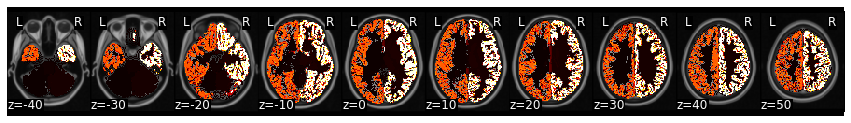

In [54]:
mask.plot()

In [32]:
data

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

In [3]:
mask = Brain_Data('/Users/jihyeonje/Downloads/100206/MNINonLinear/ROIs/Atlas_ROIs.2.nii.gz')

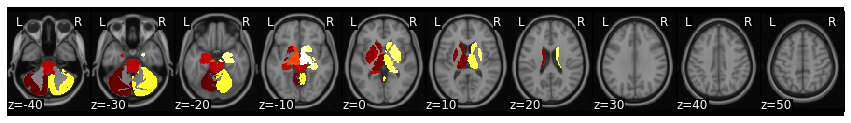

In [4]:
mask.plot()

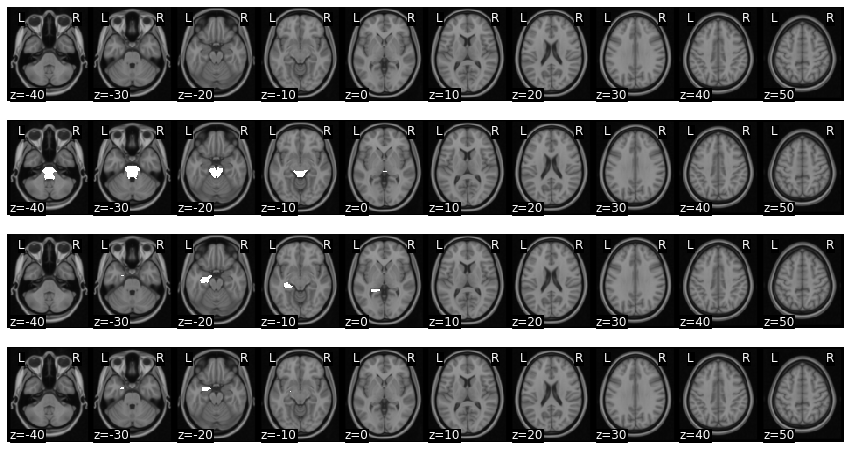

In [57]:
mask_x = expand_mask(mask)
f = mask_x[14:18].plot()


Text(0.5, 0, 'Time (TRs)')

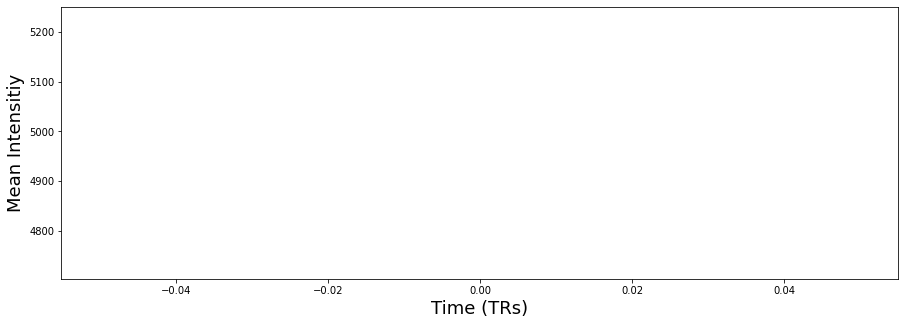

In [63]:
vmpfc = smoothed.extract_roi(mask=mask_x[15])

plt.figure(figsize=(15,5))
plt.plot(vmpfc, linewidth=3)
plt.ylabel('Mean Intensitiy', fontsize=18)
plt.xlabel('Time (TRs)', fontsize=18)

In [67]:
smoothed

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)